WE USE EXITED COLUMS AS CHURN RATE IN THIS CODE


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
path = '/content/drive/MyDrive/dataset/Churn_Modelling.csv'
df = pd.read_csv(path)
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [30]:
df.drop('CustomerId',axis = 'columns',inplace = True)
df.drop('RowNumber',axis = 'columns',inplace = True)
df.drop('Surname',axis = 'columns',inplace = True)

In [31]:
df.shape

(10000, 11)

In [32]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [33]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [34]:
pd.to_numeric(df.Exited)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
df[df.Exited==0].shape


(7963, 11)

In [36]:
CR_exited_no = df[df.Exited==0].CreditScore
CR_exited_yes = df[df.Exited==1].CreditScore

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


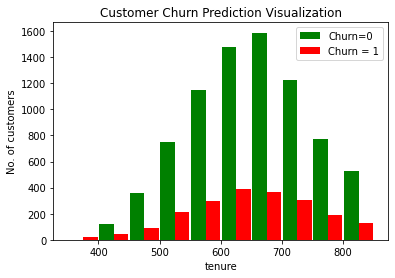

In [37]:
plt.xlabel('tenure')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([CR_exited_no,CR_exited_yes],rwidth = 0.95,color=['green','red'],label = ['Churn=0','Churn = 1'])
plt.legend()

In [38]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [39]:
print_unique_col_values(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [40]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df['Geography'].replace({'France':1,'Spain':0,'Germany':2},inplace=True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [42]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [43]:
X_test.shape


(2000, 10)

In [44]:

import tensorflow as tf
from tensorflow import keras


In [45]:
len(X_train.columns)


10

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
250/250 [==============================] - 1s 2ms/step - loss: 450.5747 - accuracy: 0.6489
Epoch 2/5
250/250 [==============================] - 0s 2ms/step - loss: 43.2643 - accuracy: 0.6641
Epoch 3/5
250/250 [==============================] - 0s 2ms/step - loss: 39.9055 - accuracy: 0.6721
Epoch 4/5
250/250 [==============================] - 0s 2ms/step - loss: 34.0732 - accuracy: 0.6735
Epoch 5/5
250/250 [==============================] - 0s 2ms/step - loss: 28.1891 - accuracy: 0.6709


In [48]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 12.3391 - accuracy: 0.7565


[12.33910846710205, 0.7565000057220459]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [50]:
print('classification report:\n',classification_report(y_test,y_pred_classes))

classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
